In [1]:
# imports
from matplotlib import pyplot as plt
import numpy as np

from frb import frb

from astropy import units

from frb import utils

## Test "MC" approach for one FRB

In [2]:
frb190611 = frb.FRB.by_name('FRB190611')
HG190611 = frb190611.grab_host()

In [3]:
## Calculate offset

In [4]:
HG190611.coord.separation(frb190611.coord).to('arcsec').value
sep = HG190611.coord.separation(frb190611.coord).to('arcsec').value
sep

2.125146022568732

In [5]:
a = np.sqrt(frb190611.eellipse['a_sys'] ** 2 + frb190611.eellipse['a'] ** 2)
b = np.sqrt(frb190611.eellipse['b_sys'] ** 2 + frb190611.eellipse['b'] ** 2)
sepx = sep+a # Distance in RA from FRB centroid to sigma_RA
sepy = sep+b 

In [6]:
a,b

(0.8062257748298549, 0.7615773105863908)

In [7]:
def gauss_2d(sep,sepx,sepy):
    x = np.random.normal(sep,sepx,100)
    y = np.random.normal(sep,sepy,100)
    return (x,y)

In [8]:
gauss_2d(sep,sepx,sepy)

(array([-1.12025232, -0.53815218,  5.03315001,  1.99830995, -1.00604146,
        -4.87328878,  0.55302743,  2.16212194,  4.74630447,  5.05366104,
        -3.4157724 ,  6.33588845, -7.78882428,  4.21979229,  2.56605077,
         0.20402952,  1.39944928,  2.71606754, -0.19493718,  1.00056871,
         4.69606965, -2.63953756,  0.92255782,  4.52227833, -1.66226722,
         0.13255551,  2.90689318, -2.12750668,  5.3489478 ,  0.8739022 ,
         0.8543507 , -0.39497751, -4.50281026,  0.8408807 ,  4.70583657,
         0.6229847 ,  3.68605565,  2.20938062,  2.35949849,  3.84223768,
         2.53087032,  6.40697945, -0.62489904,  1.12111533,  3.12011205,
         2.60194267, -1.67005309,  2.51077408,  3.42786912, -1.05504177,
         1.67189915, -3.57523514,  3.99794324,  5.92391497,  1.51816216,
         1.65723135,  4.55011482, -0.41210519,  2.80774052, -2.24412957,
         7.15755117, -2.58812289,  4.58191997,  2.90269121,  1.7132366 ,
        -1.8730664 ,  2.57472735,  1.23212578,  4.4

## Try instead to make a grid of points from a 2D gaussian

In [55]:
frb190611coord = frb190611.coord
hgcoord = HG190611.coord
frb_ra = frb190611coord.ra.value
frb_dec = frb190611coord.dec.value
theta = frb190611.eellipse['theta'] * units.deg # Include PA of ellipse
x = np.linspace(frb_ra-(3*a/3600), frb_ra+(3*a/3600), 1000)
y = np.linspace(frb_dec-(3*b/3600), frb_dec+(3*b/3600), 1000)

In [56]:
xx,yy = np.meshgrid(x,y) # Generate grid points
print(xx,yy)

[[320.74478648 320.74478782 320.74478917 ... 320.7461275  320.74612884
  320.74613019]
 [320.74478648 320.74478782 320.74478917 ... 320.7461275  320.74612884
  320.74613019]
 [320.74478648 320.74478782 320.74478917 ... 320.7461275  320.74612884
  320.74613019]
 ...
 [320.74478648 320.74478782 320.74478917 ... 320.7461275  320.74612884
  320.74613019]
 [320.74478648 320.74478782 320.74478917 ... 320.7461275  320.74612884
  320.74613019]
 [320.74478648 320.74478782 320.74478917 ... 320.7461275  320.74612884
  320.74613019]] [[-79.39821798 -79.39821798 -79.39821798 ... -79.39821798 -79.39821798
  -79.39821798]
 [-79.39821671 -79.39821671 -79.39821671 ... -79.39821671 -79.39821671
  -79.39821671]
 [-79.39821544 -79.39821544 -79.39821544 ... -79.39821544 -79.39821544
  -79.39821544]
 ...
 [-79.39695123 -79.39695123 -79.39695123 ... -79.39695123 -79.39695123
  -79.39695123]
 [-79.39694996 -79.39694996 -79.39694996 ... -79.39694996 -79.39694996
  -79.39694996]
 [-79.39694869 -79.39694869 -79.

In [57]:
sky_mesh = utils.radec_to_coord((xx,yy)) # Turn the individual RA and Dex (x and y) in combined coordinate
ang_diff = hgcoord.separation(sky_mesh) # Measure the offset from host to each point
print(ang_diff.to('arcsec').value)

[[3.72938179 3.72969291 3.73000422 ... 4.12434345 4.12481663 4.12528996]
 [3.72509592 3.7254074  3.72571907 ... 4.12046845 4.12094209 4.12141586]
 [3.72081073 3.72112257 3.7214346  ... 4.1165949  4.11706898 4.11754319]
 ...
 [1.68250005 1.68318965 1.68387944 ... 2.43579416 2.43659538 2.43739666]
 [1.68540072 1.68608913 1.68677773 ... 2.43779874 2.4385993  2.43939993]
 [1.6883088  1.68899603 1.68968344 ... 2.43981025 2.44061016 2.44141012]]


In [58]:
# Define points to be within ellipse, rotated by theta if relevant
in_ellipse = ((xx - frb_ra) * np.cos(theta).value + (yy - frb_dec) * np.sin(theta).value) ** 2 / (
                (a/3600) ** 2) + ((xx - frb_ra) * np.sin(theta).value - (yy - frb_dec) * np.cos(theta).value) ** 2 / (
                             (b/3600) ** 2) <= 1

In [59]:
in_ellipse

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [60]:
frb190611coord

<SkyCoord (ICRS): (ra, dec) in deg
    (320.74545833, -79.39758333)>

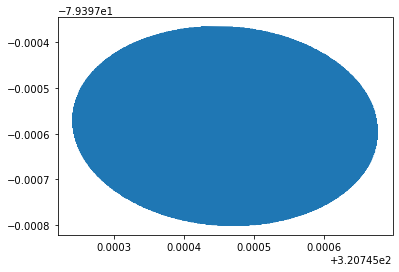

In [61]:
# Plot grid points 
plt.plot(xx[in_ellipse], yy[in_ellipse])

In [62]:
# Trying something else, doesn't seem to work
hgcoord = HG190611.coord
hg_ra = hgcoord.ra.value
hg_dec = hgcoord.dec.value

#for i in np.arange(np.shape(xx[in_ellipse])):
x_diff = (hg_ra - xx) * np.cos(hg_dec)
y_diff = hg_dec - yy    

ang_off = np.sqrt(x_diff**2 + y_diff**2)
ang_off*3600



array([[5.80136154, 5.80389105, 5.80642119, ..., 8.53777181, 8.54066294,
        8.54355428],
       [5.79860729, 5.80113801, 5.80366935, ..., 8.53590056, 8.53879232,
        8.54168429],
       [5.79585535, 5.79838726, 5.80091981, ..., 8.53403134, 8.53692375,
        8.53981635],
       ...,
       [4.75164323, 4.75473122, 4.75781933, ..., 7.8623066 , 7.86544603,
        7.86858547],
       [4.75267107, 4.7557584 , 4.75884584, ..., 7.86292783, 7.86606701,
        7.86920621],
       [4.7537031 , 4.75678976, 4.75987652, ..., 7.86355167, 7.8666906 ,
        7.86982955]])

In [63]:
#Generate an analytical 2d gaussian
def gauss_2da(x,y, sma, smb):
    
    e_x = 1/(sma*np.sqrt(2*np.pi)) * np.exp(-(x-frb_ra)**2 / (2 * sma**2))
    e_y = 1/(smb*np.sqrt(2*np.pi)) * np.exp(-(y-frb_dec)**2 / (2 * smb**2))
    
    print(np.shape(e_x))
    w = e_x * e_y
    return w

(1000, 1000)
0.9999999999999999


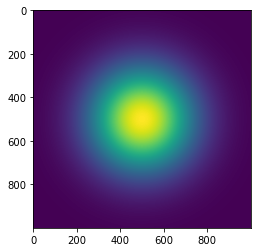

In [64]:
# Define weight scheme, using the grid points xx and yy and the sigma RA and Dec (a and b) in degs
w = gauss_2da(xx, yy, (a/3600), (b/3600))
#w[~in_ellipse] = 0.0

# Normalize w
norm_w = w / np.sum(w)
print(np.sum(norm_w)) 
plt.imshow(norm_w)

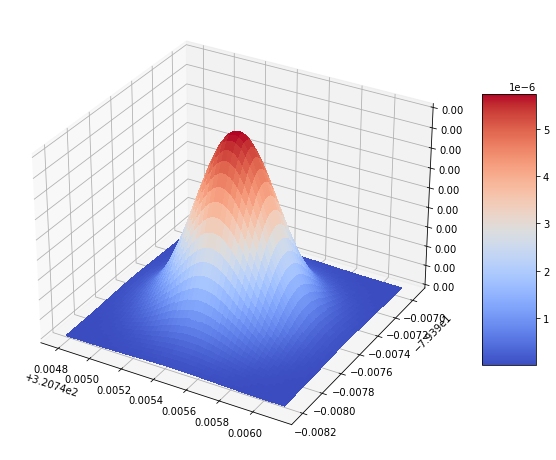

In [70]:
from mpl_toolkits.mplot3d import Axes3D  
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter


fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')

surf = ax.plot_surface(xx, yy, norm_w, cmap=cm.coolwarm, linewidth=0, antialiased=False)

#ax.set_zlim(-5e-6, 5e-6)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [78]:
# Calculate average offset (should be close to 2.1'')
mean = np.sum(norm_w * ang_diff) #/ np.sum(norm_w) 
mean_ang = mean.to('arcsec').value
print(mean_ang)

2.218980392142255


In [79]:
# Calculate SD from that (error on offset assuming sqrt(sigma_RA^2 + sigma_Dec^2) = 1.1, which seems more sensible for 190611)
sd = np.sqrt(np.sum((ang_diff-mean)**2 * norm_w))
print(sd.to('arcsec').value) # Should this be multiplied by 2 to get the full "width?" 

0.42243859300468195
